In [154]:
import torch
from torch import nn
from torch.utils.data import DataLoader
import numpy as np
from torch.utils.data import Dataset
import pandas as pd
from tqdm import tqdm
import torch.backends.cudnn as cudnn
import random
import numpy as np
from matplotlib import pyplot as plt
seed = 1443
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)


In [155]:
batch_size = 256
learning_rate = 0.1
epoches = 100



In [156]:
class Data(Dataset):
    def __init__(self, csv_file, transform=None):

        super(Data, self).__init__()
        file = pd.read_csv(csv_file)
        self.input_data = file[['x1', 'x2']].values
        self.labels = file['y'].values.astype(int)   
          
    def __getitem__(self, index):
        data_item = self.input_data[index]
        data_item = torch.tensor(data_item).float()

        label = self.labels[index]
        return data_item, label

    def __len__(self):
        return len(self.input_data)

In [157]:
train_data = Data('train_q4.csv')
test_data = Data('test_q4.csv')
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [158]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
           nn.Linear(2,4),
           nn.ReLU(),
           nn.Linear(4,4),
           nn.ReLU(),
           nn.Linear(4,3),
           nn.Softmax(),
        )
        self.initialize_weights()

        
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
    
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)
                if m.bias is not None:
                     nn.init.zeros_(m.bias)  

In [159]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = NeuralNetwork().to(device)

In [160]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  0%|          | 0/100 [00:00<?, ?it/s]c:\Python311\Lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
  1%|          | 1/100 [00:00<00:31,  3.18it/s]

 Train accuracy: 56.3%, Avg loss: 0.956809


  2%|▏         | 2/100 [00:00<00:25,  3.79it/s]

 Train accuracy: 77.8%, Avg loss: 0.832060


  3%|▎         | 3/100 [00:00<00:24,  4.04it/s]

 Train accuracy: 83.6%, Avg loss: 0.772307


  4%|▍         | 4/100 [00:00<00:22,  4.24it/s]

 Train accuracy: 85.8%, Avg loss: 0.741332


  5%|▌         | 5/100 [00:01<00:21,  4.42it/s]

 Train accuracy: 86.7%, Avg loss: 0.723998


  6%|▌         | 6/100 [00:01<00:20,  4.49it/s]

 Train accuracy: 87.1%, Avg loss: 0.712013


  7%|▋         | 7/100 [00:01<00:23,  3.99it/s]

 Train accuracy: 87.5%, Avg loss: 0.702689
 Train accuracy: 87.8%, Avg loss: 0.695003


  9%|▉         | 9/100 [00:02<00:20,  4.37it/s]

 Train accuracy: 88.1%, Avg loss: 0.688602


 10%|█         | 10/100 [00:02<00:21,  4.24it/s]

 Train accuracy: 88.2%, Avg loss: 0.683124


 11%|█         | 11/100 [00:02<00:20,  4.32it/s]

 Train accuracy: 88.3%, Avg loss: 0.678255
 Train accuracy: 88.4%, Avg loss: 0.673791


 13%|█▎        | 13/100 [00:03<00:19,  4.41it/s]

 Train accuracy: 88.5%, Avg loss: 0.669514


 14%|█▍        | 14/100 [00:03<00:19,  4.45it/s]

 Train accuracy: 88.5%, Avg loss: 0.665222


 15%|█▌        | 15/100 [00:03<00:18,  4.56it/s]

 Train accuracy: 88.6%, Avg loss: 0.660694
 Train accuracy: 88.9%, Avg loss: 0.655656


 17%|█▋        | 17/100 [00:03<00:17,  4.82it/s]

 Train accuracy: 91.5%, Avg loss: 0.649704
 Train accuracy: 94.2%, Avg loss: 0.642312


 19%|█▉        | 19/100 [00:04<00:16,  4.99it/s]

 Train accuracy: 95.7%, Avg loss: 0.633291
 Train accuracy: 96.2%, Avg loss: 0.623843


 22%|██▏       | 22/100 [00:04<00:15,  5.15it/s]

 Train accuracy: 96.2%, Avg loss: 0.615983
 Train accuracy: 96.4%, Avg loss: 0.610285


 24%|██▍       | 24/100 [00:05<00:14,  5.15it/s]

 Train accuracy: 96.6%, Avg loss: 0.606193
 Train accuracy: 96.6%, Avg loss: 0.603109


 25%|██▌       | 25/100 [00:05<00:18,  4.12it/s]

 Train accuracy: 96.6%, Avg loss: 0.600660


 26%|██▌       | 26/100 [00:05<00:17,  4.12it/s]

 Train accuracy: 96.7%, Avg loss: 0.598636
 Train accuracy: 96.8%, Avg loss: 0.596911


 28%|██▊       | 28/100 [00:06<00:16,  4.26it/s]

 Train accuracy: 96.8%, Avg loss: 0.595402


 29%|██▉       | 29/100 [00:06<00:16,  4.20it/s]

 Train accuracy: 96.9%, Avg loss: 0.594060


 30%|███       | 30/100 [00:06<00:16,  4.22it/s]

 Train accuracy: 97.0%, Avg loss: 0.592848


 31%|███       | 31/100 [00:06<00:16,  4.21it/s]

 Train accuracy: 97.1%, Avg loss: 0.591764


 32%|███▏      | 32/100 [00:07<00:15,  4.31it/s]

 Train accuracy: 97.1%, Avg loss: 0.590771


 33%|███▎      | 33/100 [00:07<00:15,  4.24it/s]

 Train accuracy: 97.2%, Avg loss: 0.589850


 34%|███▍      | 34/100 [00:07<00:15,  4.29it/s]

 Train accuracy: 97.2%, Avg loss: 0.588986
 Train accuracy: 97.3%, Avg loss: 0.588172


 36%|███▌      | 36/100 [00:08<00:14,  4.46it/s]

 Train accuracy: 97.3%, Avg loss: 0.587402
 Train accuracy: 97.3%, Avg loss: 0.586671


 38%|███▊      | 38/100 [00:08<00:14,  4.39it/s]

 Train accuracy: 97.4%, Avg loss: 0.585973


 39%|███▉      | 39/100 [00:08<00:13,  4.43it/s]

 Train accuracy: 97.5%, Avg loss: 0.585305


 40%|████      | 40/100 [00:09<00:13,  4.38it/s]

 Train accuracy: 97.5%, Avg loss: 0.584666


 41%|████      | 41/100 [00:09<00:14,  4.16it/s]

 Train accuracy: 97.6%, Avg loss: 0.584053


 42%|████▏     | 42/100 [00:09<00:13,  4.26it/s]

 Train accuracy: 97.6%, Avg loss: 0.583464


 43%|████▎     | 43/100 [00:09<00:13,  4.20it/s]

 Train accuracy: 97.7%, Avg loss: 0.582897


 44%|████▍     | 44/100 [00:09<00:12,  4.32it/s]

 Train accuracy: 97.7%, Avg loss: 0.582352


 45%|████▌     | 45/100 [00:10<00:12,  4.37it/s]

 Train accuracy: 97.7%, Avg loss: 0.581827


 47%|████▋     | 47/100 [00:10<00:12,  4.39it/s]

 Train accuracy: 97.8%, Avg loss: 0.581322
 Train accuracy: 97.8%, Avg loss: 0.580837


 48%|████▊     | 48/100 [00:10<00:11,  4.50it/s]

 Train accuracy: 97.8%, Avg loss: 0.580371


 49%|████▉     | 49/100 [00:11<00:11,  4.54it/s]

 Train accuracy: 97.9%, Avg loss: 0.579922


 50%|█████     | 50/100 [00:11<00:11,  4.48it/s]

 Train accuracy: 97.9%, Avg loss: 0.579489


 51%|█████     | 51/100 [00:11<00:11,  4.40it/s]

 Train accuracy: 97.9%, Avg loss: 0.579073


 52%|█████▏    | 52/100 [00:11<00:10,  4.41it/s]

 Train accuracy: 97.9%, Avg loss: 0.578673


 53%|█████▎    | 53/100 [00:12<00:11,  4.25it/s]

 Train accuracy: 98.0%, Avg loss: 0.578287


 54%|█████▍    | 54/100 [00:12<00:10,  4.29it/s]

 Train accuracy: 98.0%, Avg loss: 0.577915


 55%|█████▌    | 55/100 [00:12<00:10,  4.31it/s]

 Train accuracy: 98.0%, Avg loss: 0.577559


 56%|█████▌    | 56/100 [00:12<00:10,  4.36it/s]

 Train accuracy: 98.0%, Avg loss: 0.577216


 57%|█████▋    | 57/100 [00:12<00:09,  4.39it/s]

 Train accuracy: 98.1%, Avg loss: 0.576887


 58%|█████▊    | 58/100 [00:13<00:09,  4.36it/s]

 Train accuracy: 98.1%, Avg loss: 0.576573


 59%|█████▉    | 59/100 [00:13<00:09,  4.42it/s]

 Train accuracy: 98.1%, Avg loss: 0.576272


 60%|██████    | 60/100 [00:13<00:09,  4.28it/s]

 Train accuracy: 98.2%, Avg loss: 0.575983


 61%|██████    | 61/100 [00:13<00:08,  4.42it/s]

 Train accuracy: 98.2%, Avg loss: 0.575707


 62%|██████▏   | 62/100 [00:14<00:08,  4.25it/s]

 Train accuracy: 98.2%, Avg loss: 0.575441


 63%|██████▎   | 63/100 [00:14<00:08,  4.24it/s]

 Train accuracy: 98.3%, Avg loss: 0.575186


 64%|██████▍   | 64/100 [00:14<00:08,  4.11it/s]

 Train accuracy: 98.3%, Avg loss: 0.574943


 65%|██████▌   | 65/100 [00:14<00:08,  4.14it/s]

 Train accuracy: 98.3%, Avg loss: 0.574709


 66%|██████▌   | 66/100 [00:15<00:09,  3.78it/s]

 Train accuracy: 98.4%, Avg loss: 0.574481


 67%|██████▋   | 67/100 [00:15<00:08,  3.88it/s]

 Train accuracy: 98.4%, Avg loss: 0.574262


 68%|██████▊   | 68/100 [00:15<00:08,  3.92it/s]

 Train accuracy: 98.4%, Avg loss: 0.574049


 69%|██████▉   | 69/100 [00:15<00:07,  3.98it/s]

 Train accuracy: 98.4%, Avg loss: 0.573844


 70%|███████   | 70/100 [00:16<00:07,  4.14it/s]

 Train accuracy: 98.5%, Avg loss: 0.573644


 71%|███████   | 71/100 [00:16<00:07,  4.14it/s]

 Train accuracy: 98.5%, Avg loss: 0.573449


 72%|███████▏  | 72/100 [00:16<00:06,  4.15it/s]

 Train accuracy: 98.5%, Avg loss: 0.573262


 73%|███████▎  | 73/100 [00:16<00:06,  4.24it/s]

 Train accuracy: 98.5%, Avg loss: 0.573084


 74%|███████▍  | 74/100 [00:17<00:05,  4.34it/s]

 Train accuracy: 98.5%, Avg loss: 0.572913


 75%|███████▌  | 75/100 [00:17<00:05,  4.43it/s]

 Train accuracy: 98.5%, Avg loss: 0.572751


 76%|███████▌  | 76/100 [00:17<00:05,  4.25it/s]

 Train accuracy: 98.5%, Avg loss: 0.572595


 77%|███████▋  | 77/100 [00:17<00:05,  4.21it/s]

 Train accuracy: 98.5%, Avg loss: 0.572446


 78%|███████▊  | 78/100 [00:17<00:05,  4.11it/s]

 Train accuracy: 98.5%, Avg loss: 0.572302


 79%|███████▉  | 79/100 [00:18<00:05,  4.16it/s]

 Train accuracy: 98.6%, Avg loss: 0.572164


 80%|████████  | 80/100 [00:18<00:04,  4.25it/s]

 Train accuracy: 98.6%, Avg loss: 0.572031


 81%|████████  | 81/100 [00:18<00:04,  4.14it/s]

 Train accuracy: 98.6%, Avg loss: 0.571903


 82%|████████▏ | 82/100 [00:18<00:04,  4.19it/s]

 Train accuracy: 98.6%, Avg loss: 0.571780


 83%|████████▎ | 83/100 [00:19<00:04,  4.20it/s]

 Train accuracy: 98.6%, Avg loss: 0.571662


 84%|████████▍ | 84/100 [00:19<00:03,  4.19it/s]

 Train accuracy: 98.6%, Avg loss: 0.571548


 85%|████████▌ | 85/100 [00:19<00:03,  4.19it/s]

 Train accuracy: 98.6%, Avg loss: 0.571438


 86%|████████▌ | 86/100 [00:19<00:03,  4.13it/s]

 Train accuracy: 98.7%, Avg loss: 0.571332


 87%|████████▋ | 87/100 [00:20<00:03,  4.05it/s]

 Train accuracy: 98.7%, Avg loss: 0.571229


 88%|████████▊ | 88/100 [00:20<00:03,  3.74it/s]

 Train accuracy: 98.7%, Avg loss: 0.571129


 89%|████████▉ | 89/100 [00:20<00:03,  3.64it/s]

 Train accuracy: 98.7%, Avg loss: 0.571032


 90%|█████████ | 90/100 [00:21<00:02,  3.74it/s]

 Train accuracy: 98.7%, Avg loss: 0.570937


 91%|█████████ | 91/100 [00:21<00:02,  3.96it/s]

 Train accuracy: 98.7%, Avg loss: 0.570845


 92%|█████████▏| 92/100 [00:21<00:01,  4.05it/s]

 Train accuracy: 98.7%, Avg loss: 0.570755


 93%|█████████▎| 93/100 [00:21<00:01,  4.20it/s]

 Train accuracy: 98.7%, Avg loss: 0.570667


 94%|█████████▍| 94/100 [00:21<00:01,  4.28it/s]

 Train accuracy: 98.7%, Avg loss: 0.570580


 95%|█████████▌| 95/100 [00:22<00:01,  4.40it/s]

 Train accuracy: 98.7%, Avg loss: 0.570495


 96%|█████████▌| 96/100 [00:22<00:00,  4.32it/s]

 Train accuracy: 98.7%, Avg loss: 0.570412


 97%|█████████▋| 97/100 [00:22<00:00,  4.11it/s]

 Train accuracy: 98.7%, Avg loss: 0.570332


 98%|█████████▊| 98/100 [00:22<00:00,  4.26it/s]

 Train accuracy: 98.7%, Avg loss: 0.570253


 99%|█████████▉| 99/100 [00:23<00:00,  4.27it/s]

 Train accuracy: 98.7%, Avg loss: 0.570174


100%|██████████| 100/100 [00:23<00:00,  4.29it/s]

 Train accuracy: 98.7%, Avg loss: 0.570097


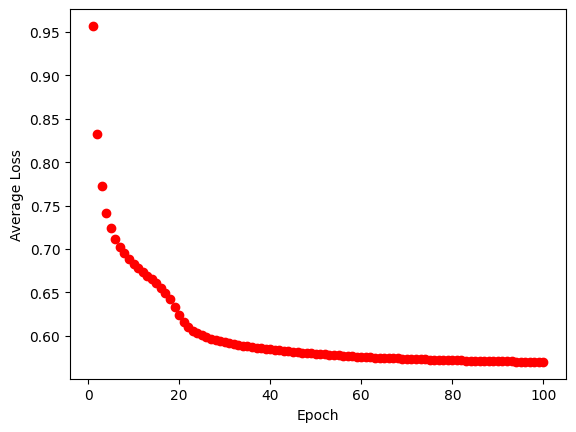

In [161]:
model.train()
epoches_time=0
for epoch in tqdm(range(epoches)):
    epoches_time=epoches_time+1
    train_loss, correct = 0, 0
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)

        pred = model(X)

        loss = loss_fn(pred, y.long())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # record loss
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    size = len(train_dataloader.dataset)
    train_loss /= len(train_dataloader)
    correct /= size
    print(f" Train accuracy: {(100*correct):>0.1f}%, Avg loss: {train_loss:>8f}")
    plt.plot(epoches_time,train_loss,"ro")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.show()


In [162]:
model.eval()
correct = 0
# Turn off gradient descent
with torch.no_grad():
    for X, y in tqdm(test_dataloader):
        X, y = X.to(device), y.to(device)
        pred = model(X)
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
size = len(test_dataloader.dataset)
correct = correct / size
print(f" Test accuracy: {(100*correct):>0.1f}%")

100%|██████████| 8/8 [00:00<00:00, 156.87it/s]

 Test accuracy: 95.0%
